# Part 1: Data scraping and preparation


### Step 1: Scrape your competitor's data


In [1]:
from bs4 import BeautifulSoup as bs
import requests as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import display_html


In [2]:
request = re.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
htmlPage = request.text
soup = bs(htmlPage, 'html.parser')
print(soup.prettify()[:])

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="To

In [3]:
tables = soup.find_all("table")
First_Step_Done = HTML(str(tables))
First_Step_Done = pd.read_html(str(tables))[0]
Final_Step_Of_One = pd.DataFrame(First_Step_Done)
columns = ['Rank', 'X_Classification', 'Date', 'Region', 'Start_Time', 'Maximum_Time', 'End_Time', 'Movie']
Final_Step_Of_One.columns = columns
Final_Step_Of_One[0:8]

,Rank,X_Classification,Date,Region,Start_Time,Maximum_Time,End_Time,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive


### Step 2: Tidy the top 50 solar flare data

In [4]:
step_Two = Final_Step_Of_One.iloc[:, :-1]

for index in step_Two.index:
    step_Two['Start_Time'][index] = step_Two['Date'][index] + ' ' + step_Two['Start_Time'][index]
    step_Two['Maximum_Time'][index] = step_Two['Date'][index] + ' ' + step_Two['Maximum_Time'][index]
    step_Two['End_Time'][index] = step_Two['Date'][index] + ' ' + step_Two['End_Time'][index]

step_Two['Start_Time'] = pd.to_datetime(step_Two['Start_Time'])
step_Two['Maximum_Time'] = pd.to_datetime(step_Two['Maximum_Time'])
step_Two['End_Time'] = pd.to_datetime(step_Two['End_Time'])
step_Two.drop('Date', axis=1, inplace=True) 
step_Two.to_csv('Top50SolarFlares.csv')
step_Two[0:8]

C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,X_Classification,Region,Start_Time,Maximum_Time,End_Time
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00


### Step 3: Scrape the NASA data

In [5]:
requestStep3 = re.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
htmlPageStep3 = requestStep3.text
soup = bs(htmlPageStep3, 'html.parser').text
clearTable = soup.split('\n')

newClearTable = clearTable[15:-4]

Nasa_List = []
Nasa_Resulted_List = []
for rowNasa in newClearTable:
    Nasa_List = rowNasa.split(' ')
    Nasa_List = list(filter(lambda a: a != '', Nasa_List))
    Nasa_Resulted_List.append(Nasa_List)

NASA_DataFrame = pd.DataFrame(Nasa_Resulted_List)
colums = ['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'Start_Frequency', 'End_Frequency', 'Flare_Location', 'Flare_Region', 'Importance', 'CME_Date', 'CME_Time', 'CPA', 'Width', 'Speed', 'Plots']

NASA_DataFrame_Filtered = NASA_DataFrame.iloc[:,0:12]
NASA_DataFrame_Filtered.columns = colums[0:-3]
NASA_DataFrame_Filtered['Start_Date'] = pd.to_datetime(NASA_DataFrame_Filtered['Start_Date'])
NASA_DataFrame_Filtered['Start_Date'] = NASA_DataFrame_Filtered['Start_Date'].dt.strftime('%m/%d/%Y')

for index in NASA_DataFrame_Filtered.index:
    NASA_DataFrame_Filtered['End_Date'][index] = NASA_DataFrame_Filtered['Start_Date'][index]
    NASA_DataFrame_Filtered['CME_Date'][index] = NASA_DataFrame_Filtered['Start_Date'][index]

NASA_DataFrame_Filtered = NASA_DataFrame_Filtered.replace(to_replace ="Halo", value ="NaN") 
NASA_DataFrame_Filtered[0:8]

C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Islam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA
0,04/01/1997,14:00,04/01/1997,14:15,8000,4000,S25E16,8026,M1.3,04/01/1997,15:18,74
1,04/07/1997,14:30,04/07/1997,17:30,11000,1000,S28E19,8027,C6.8,04/07/1997,14:27,NaN
2,05/12/1997,05:15,05/12/1997,16:00,12000,80,N21W08,8038,C1.3,05/12/1997,05:30,NaN
3,05/21/1997,20:20,05/21/1997,22:00,5000,500,N05W12,8040,M1.3,05/21/1997,21:00,263
4,09/23/1997,21:53,09/23/1997,22:16,6000,2000,S29E25,8088,C1.4,09/23/1997,22:02,133
5,11/03/1997,05:15,11/03/1997,12:00,14000,250,S20W13,8100,C8.6,11/03/1997,05:28,240
6,11/03/1997,10:30,11/03/1997,11:30,14000,5000,S16W21,8100,M4.2,11/03/1997,11:11,233
7,11/04/1997,06:00,11/04/1997,04:30,14000,100,S14W33,8100,X2.1,11/04/1997,06:10,NaN


### Step 4: Tidy the NASA table

In [6]:
New_NASA_DataFrame = NASA_DataFrame.iloc[:,0:15]
New_NASA_DataFrame.columns = colums

New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="--:--", value ="00:00")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="24:00", value ="00:00")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="Halo", value ="NaN") 
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="-----", value ="NaN")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="----", value ="NaN")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="????", value ="NaN")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="--/--", value ="NaN")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="------", value ="NaN")
New_NASA_DataFrame = New_NASA_DataFrame.replace(to_replace ="---", value ="NaN")

New_NASA_DataFrame['Start_Date'] = pd.to_datetime(New_NASA_DataFrame['Start_Date'])
New_NASA_DataFrame['year'] = New_NASA_DataFrame['Start_Date'].dt.year
New_NASA_DataFrame['Start_Date'] = New_NASA_DataFrame['Start_Date'].dt.strftime('%m/%d/%Y')

for index in New_NASA_DataFrame.index:
    if(New_NASA_DataFrame['End_Date'][index] != 'NaN'):
        New_NASA_DataFrame['End_Date'][index] = str(New_NASA_DataFrame['End_Date'][index]) + '/' + str(New_NASA_DataFrame['year'][index])
    if(New_NASA_DataFrame['CME_Date'][index] != 'NaN'):
        New_NASA_DataFrame['CME_Date'][index] = str(New_NASA_DataFrame['CME_Date'][index]) + '/' + str(New_NASA_DataFrame['year'][index])

New_NASA_DataFrame.drop('year', axis=1, inplace=True)

for index in New_NASA_DataFrame.index:
    if(New_NASA_DataFrame['Start_Date'][index] != 'NaN'):
        New_NASA_DataFrame['Start_Date'][index] = str(New_NASA_DataFrame['Start_Date'][index]) + ' ' + str(New_NASA_DataFrame['Start_Time'][index])
    if(New_NASA_DataFrame['End_Date'][index] != 'NaN'):
        New_NASA_DataFrame['End_Date'][index] = str(New_NASA_DataFrame['End_Date'][index]) + ' ' + str(New_NASA_DataFrame['End_Time'][index])
    if(New_NASA_DataFrame['CME_Date'][index] != 'NaN'):
        New_NASA_DataFrame['CME_Date'][index] = str(New_NASA_DataFrame['CME_Date'][index]) + ' ' + str(New_NASA_DataFrame['CME_Time'][index])


New_NASA_DataFrame.drop('Start_Time', axis=1, inplace=True) 
New_NASA_DataFrame.drop('End_Time', axis=1, inplace=True) 
New_NASA_DataFrame.drop('CME_Time', axis=1, inplace=True)

New_NASA_DataFrame['Start_Date'] = pd.to_datetime(New_NASA_DataFrame['Start_Date'], errors='coerce')
New_NASA_DataFrame['End_Date'] = pd.to_datetime(New_NASA_DataFrame['End_Date'], errors='coerce')
New_NASA_DataFrame['CME_Date'] = pd.to_datetime(New_NASA_DataFrame['CME_Date'], errors='coerce')

New_NASA_DataFrame = New_NASA_DataFrame.rename(columns={"Start_Date": "Start_DateTime", "End_Date": "End_DateTime", "CME_Date": "CME_DateTime"})

Is_Hola = []
Width_Lower_Bound = []
for index in New_NASA_DataFrame.index:
    if(New_NASA_DataFrame['CPA'][index] == 'NaN'):
        Is_Hola.append('True')
    else:
        Is_Hola.append('False')
        
    if(New_NASA_DataFrame['Width'][index].__contains__('>')):
        Width_Lower_Bound.append('True')
    else:
        Width_Lower_Bound.append('False')
    
    if(New_NASA_DataFrame['Flare_Region'][index].isdigit()):
        continue
    else:
        New_NASA_DataFrame['Flare_Region'][index] = 'NaN'
    
    if(New_NASA_DataFrame['Flare_Location'][index].isalpha() or New_NASA_DataFrame['Flare_Location'][index].__contains__('?')):
        New_NASA_DataFrame['Flare_Location'][index] = 'NaN'
    else:
        continue
    
    if(New_NASA_DataFrame['Importance'][index].isalpha()):
        New_NASA_DataFrame['Importance'][index] = 'NaN'
    else:
        continue
    
New_NASA_DataFrame['Width'][460] = 'NaN'
New_NASA_DataFrame['Importance'][66] = 'NaN'
New_NASA_DataFrame['Is_Hola'] = Is_Hola
New_NASA_DataFrame['Width_Lower_Bound'] = Width_Lower_Bound
New_NASA_DataFrame['Width'] = New_NASA_DataFrame['Width'].str.replace(r'>', '')

New_NASA_DataFrame.to_csv('NASA.csv')
New_NASA_DataFrame[0:8]

C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value i

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,Is_Hola,Width_Lower_Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False


# Part 2: Analysis

### Question 1: Replication


* I have sorted the NASA table based on Importance Column
* I Extract Importance cells Begins with "X" only then I got the first 50 

In [7]:
New_NASA_DataFrame1 = New_NASA_DataFrame.sort_values(by='Importance', ascending=False)
solarDataFrame = New_NASA_DataFrame1[0:92]
solarDataFrame['Importance'] = solarDataFrame['Importance'].map(lambda x: x.lstrip('X'))
solarDataFrame['Importance'] = pd.to_numeric(solarDataFrame['Importance'], downcast="float")
solarDataFrame = solarDataFrame.sort_values(by='Importance', ascending=False)
solarDataFrame['Importance'] = 'X' + solarDataFrame['Importance'].astype(str)
solarDataFrame['Flare_Region'] = solarDataFrame['Flare_Region'].astype(float)
solarDataFrameTop50 = solarDataFrame[0:51]


solarDataFrameTop50.to_csv('solarDataFrameFromNASATop50.csv')
solarDataFrameTop50[0:8]

C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,Is_Hola,Width_Lower_Bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486.0,X28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393.0,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486.0,X17.0,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415.0,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486.0,X10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100.0,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673.0,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930.0,X9.0,NaT,NaN,NaN,NaN,PHTX,True,False


### Question 2: Integration


* I have checked the NASA table and Top 50 Solar table I replicated and found that Flare Region Column Value if the cell has value more than 10000 it should be subtracted to match to solar table.
* To get the best-matched rows from two datasets: I checked each row of the 50 rows if Start Datetime matches Start Time, Start Datetime matches End Time, CME Datetime matches Maximum Time and X_Classification matches Importance then that row is best to match.

In [8]:
for index in solarDataFrameTop50.index:
    if(solarDataFrameTop50['Flare_Region'][index] > 10000.0):
        solarDataFrameTop50['Flare_Region'][index] = solarDataFrameTop50['Flare_Region'][index] - 10000.0
step_Two['Region'] = step_Two['Region'].astype(str)
solarDataFrameTop50['Flare_Region'] = solarDataFrameTop50['Flare_Region'].astype(str)
solarDataFrameTop50['Flare_Region'] = solarDataFrameTop50['Flare_Region'].str.replace(r'.0$', '')
solarDataFrameTop50['Importance'] = solarDataFrameTop50['Importance'].str.replace(r'.0$', '')


def BestMatchedRows(firstDataset, secondDataset):
    rankColumnDictionary = dict()
    rank = []
    for index in firstDataset.index:
        checker = False
        for indexS in secondDataset.index:
            if(secondDataset['X_Classification'][indexS].__contains__( str(firstDataset['Importance'][index]) )  and secondDataset['Region'][indexS].__contains__(firstDataset['Flare_Region'][index]) ):
                rankColumnDictionary[index] = indexS
                break
    for index in firstDataset.index:
        if (index in rankColumnDictionary.keys()):
            rank.append(rankColumnDictionary[index]) 
        else:
            rank.append('NaN')
    firstDataset['Rank'] = rank
BestMatchedRows(solarDataFrameTop50, step_Two)
solarDataFrameTop50.to_csv('solarDataFrameTop50.csv')
solarDataFrameTop50[0:8]

C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,Is_Hola,Width_Lower_Bound,Rank
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,486,X28,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,1
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,486,X17,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,2
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,4
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,486,X10,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,5
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,6
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,2673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,7
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,930,X9,NaT,NaN,NaN,NaN,PHTX,True,False,8


### Question 3: Analysis

1. Plot attributes in the NASA dataset (starting frequencies and ending frequencies)


C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


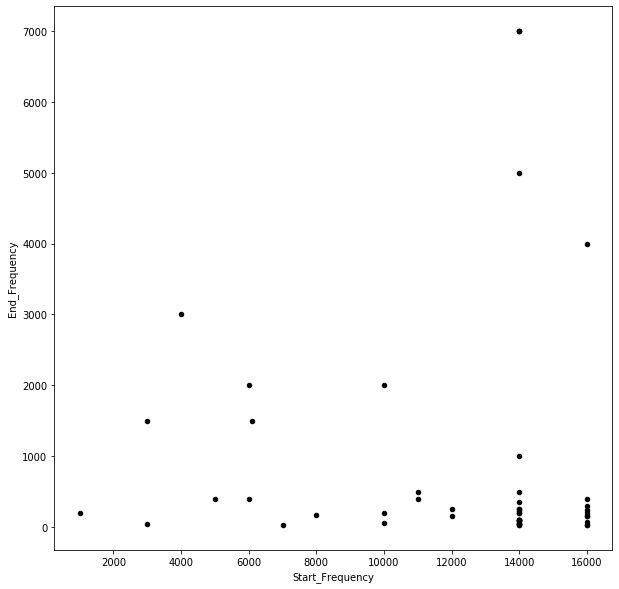

In [9]:
solarDataFrameTop50['Start_Frequency'] = pd.to_numeric(solarDataFrameTop50['Start_Frequency'])
solarDataFrameTop50['End_Frequency'] = pd.to_numeric(solarDataFrameTop50['End_Frequency'])
solarDataFrameTop50.plot(kind='scatter',x='Start_Frequency',y='End_Frequency',color='black', figsize=(10,10))
plt.show()

2. Barplot that compares proportion of Halo CMEs in the top 50 flares vs. the dataset as a whole.
     * Found that the incidence rate occurred of Halo CMEs in 50 flares is more than the whole dataset.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019882665AC8>,
      dtype=object)

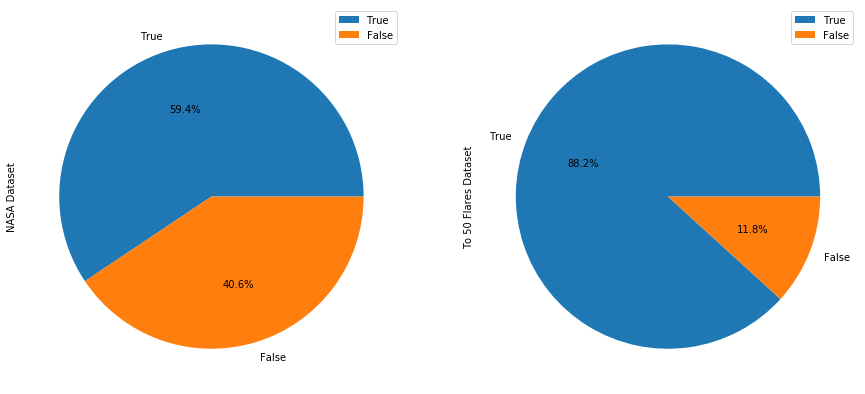

In [10]:
df = pd.DataFrame( { 'NASA Dataset':New_NASA_DataFrame['Is_Hola'], 'To 50 Flares Dataset':solarDataFrameTop50['Is_Hola'] } )
df1 = df.apply(pd.value_counts)

df1.plot.pie(subplots=True, figsize=(15, 15), autopct='%1.1f%%')